In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv(r'C:/Users/60547/Documents/py/python_lianxi/datasets/kobe_Data/kobe_data.csv')
print(df.shape)
df.head()

(30697, 25)


,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
action_type           30697 non-null object
combined_shot_type    30697 non-null object
game_event_id         30697 non-null int64
game_id               30697 non-null int64
lat                   30697 non-null float64
loc_x                 30697 non-null int64
loc_y                 30697 non-null int64
lon                   30697 non-null float64
minutes_remaining     30697 non-null int64
period                30697 non-null int64
playoffs              30697 non-null int64
season                30697 non-null object
seconds_remaining     30697 non-null int64
shot_distance         30697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             30697 non-null object
shot_zone_area        30697 non-null object
shot_zone_basic       30697 non-null object
shot_zone_range       30697 non-null object
team_id               30697 non-null int64
team_name         

Text(0.5, 1.0, 'lon and lat')

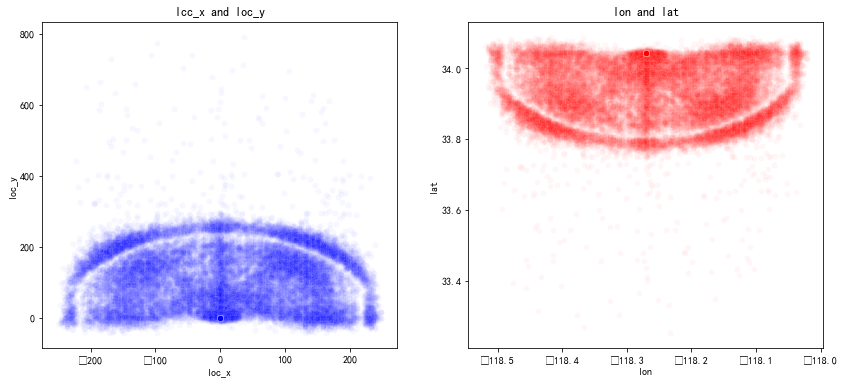

In [4]:
f,[ax1,ax2]=plt.subplots(1,2,figsize=(14,6))
sns.scatterplot(df.loc_x,df.loc_y,alpha=0.03,ax=ax1,color='b')
ax1.set_title('lcc_x and loc_y')
sns.scatterplot(df.lon,df.lat,alpha=0.03,ax=ax2,color='r')
ax2.set_title('lon and lat')

In [5]:
#将remaining minutes和remaining seconds合并成一列
# df['time_remaining']=df['minutes_remaining']+round(df['seconds_remaining']/60,2)
df['time_remaining']=df['minutes_remaining']*60+df['seconds_remaining']

In [6]:
#定义模型计算不同距离（对手，剩下时间等)科比的投篮准确率
def get_acc(df,features):
    ct=pd.crosstab(df['shot_made_flag'],df[features],rownames=['shot or miss']).apply(lambda x:x/x.sum(),axis=0)
#     return ct
    plt.figure(figsize=(10,4))
    sns.lineplot(x=ct.columns,y=ct.values[1,:])
    plt.tight_layout()
    plt.show()

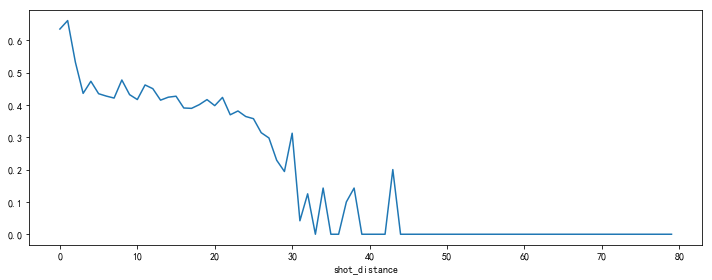

In [7]:
get_acc(df,'shot_distance')

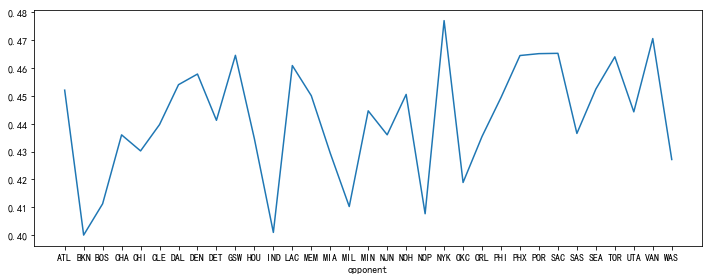

In [8]:
get_acc(df,'opponent')

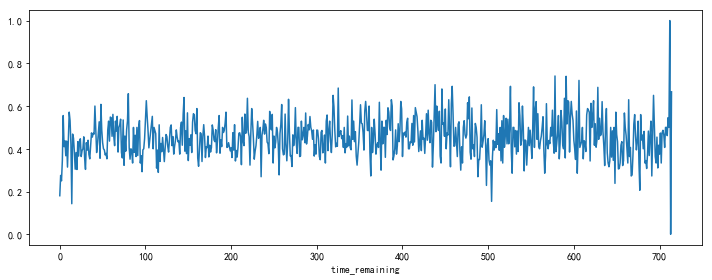

In [9]:
get_acc(df,'time_remaining')

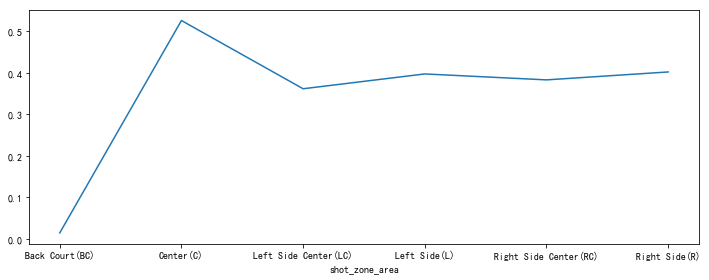

In [10]:
get_acc(df,'shot_zone_area')

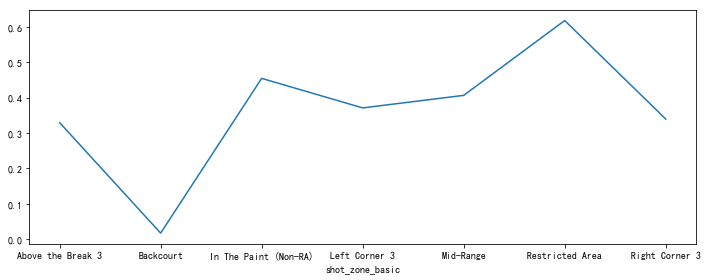

In [11]:
get_acc(df,'shot_zone_basic')

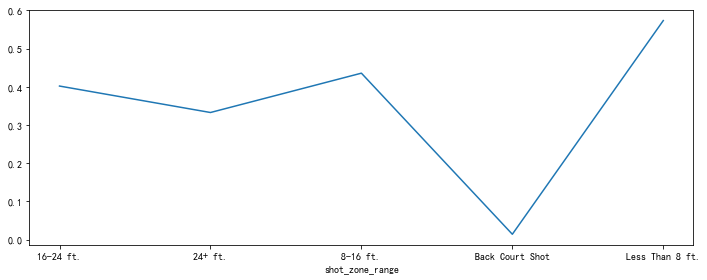

In [12]:
get_acc(df,'shot_zone_range')

In [13]:
print(df.action_type.unique())
print(df.combined_shot_type.unique())
print(df.season.unique())
print(df.shot_zone_area.unique())
print(df.shot_zone_basic.unique())
print(df.shot_zone_range.unique())


['Jump Shot' 'Driving Dunk Shot' 'Layup Shot' 'Running Jump Shot'
 'Driving Layup Shot' 'Reverse Layup Shot' 'Reverse Dunk Shot'
 'Slam Dunk Shot' 'Turnaround Jump Shot' 'Tip Shot' 'Running Hook Shot'
 'Alley Oop Dunk Shot' 'Dunk Shot' 'Alley Oop Layup shot'
 'Running Dunk Shot' 'Driving Finger Roll Shot' 'Running Layup Shot'
 'Finger Roll Shot' 'Fadeaway Jump Shot' 'Follow Up Dunk Shot' 'Hook Shot'
 'Turnaround Hook Shot' 'Running Tip Shot' 'Jump Hook Shot'
 'Running Finger Roll Shot' 'Jump Bank Shot' 'Turnaround Finger Roll Shot'
 'Hook Bank Shot' 'Driving Hook Shot' 'Running Reverse Layup Shot'
 'Driving Finger Roll Layup Shot' 'Fadeaway Bank shot' 'Pullup Jump shot'
 'Finger Roll Layup Shot' 'Turnaround Fadeaway shot'
 'Driving Reverse Layup Shot' 'Driving Slam Dunk Shot'
 'Step Back Jump shot' 'Reverse Slam Dunk Shot' 'Turnaround Bank shot'
 'Running Finger Roll Layup Shot' 'Floating Jump shot'
 'Putback Slam Dunk Shot' 'Running Bank shot' 'Driving Bank shot'
 'Putback Layup Shot'

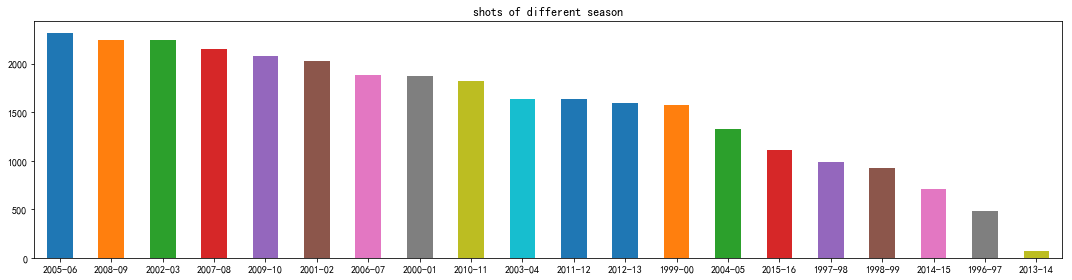

In [14]:
plt.figure(figsize=(15,4))
df.season.value_counts().sort_values(ascending=False).plot(kind='bar')
plt.title('shots of different season')
plt.xticks(rotation='horizontal')
plt.tight_layout()

In [15]:
#将某些没有业务价值的列丢弃
drop_columns=['lat','lon','team_id','team_name','shot_id','matchup','seconds_remaining','minutes_remaining','game_id','game_event_id',
              'game_date','loc_x','loc_y'
             ]
df=df.drop(drop_columns,axis=1)
df.head()

,action_type,combined_shot_type,period,playoffs,season,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,opponent,time_remaining
0,Jump Shot,Jump Shot,1,0,2000-01,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,POR,627
1,Jump Shot,Jump Shot,1,0,2000-01,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,POR,622
2,Jump Shot,Jump Shot,1,0,2000-01,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,POR,465
3,Jump Shot,Jump Shot,1,0,2000-01,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,POR,412
4,Driving Dunk Shot,Dunk,2,0,2000-01,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,POR,379


In [16]:
df['shot_type']=df['shot_type'].apply(lambda x:x[0])
df['season']=df['season'].apply(lambda x:x.split('-')[1])
df.sample(5)

,action_type,combined_shot_type,period,playoffs,season,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,opponent,time_remaining
19353,Layup Shot,Layup,1,0,12,2,1.0,2,Center(C),Restricted Area,Less Than 8 ft.,HOU,351
4847,Jump Shot,Jump Shot,2,0,03,24,0.0,3,Left Side Center(LC),Above the Break 3,24+ ft.,MEM,0
1418,Jump Shot,Jump Shot,4,0,01,15,0.0,2,Center(C),Mid-Range,8-16 ft.,ATL,0
5924,Jump Shot,Jump Shot,4,0,04,27,0.0,3,Left Side Center(LC),Above the Break 3,24+ ft.,LAC,98
29818,Jump Shot,Jump Shot,3,1,12,5,NaN,2,Center(C),In The Paint (Non-RA),Less Than 8 ft.,DEN,625


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss,confusion_matrix
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

C:\Users\60547\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\60547\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [18]:
categres=['action_type','combined_shot_type','opponent']
# for var in categres:
#     kobe=pd.concat([df,pd.get_dummies(df.var,prefix=var)],axis=0)
#     kobe=kobe.drop(var)

kobe=pd.get_dummies(df)
kobe.sample(5)

,period,playoffs,shot_distance,shot_made_flag,time_remaining,action_type_Alley Oop Dunk Shot,action_type_Alley Oop Layup shot,action_type_Cutting Finger Roll Layup Shot,action_type_Cutting Layup Shot,action_type_Driving Bank shot,...,opponent_PHI,opponent_PHX,opponent_POR,opponent_SAC,opponent_SAS,opponent_SEA,opponent_TOR,opponent_UTA,opponent_VAN,opponent_WAS
18535,4,0,7,0.0,67,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30198,4,1,27,0.0,36,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27170,3,1,15,0.0,139,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
29977,2,1,2,1.0,60,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26279,1,1,19,0.0,391,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [19]:
kobe_x_train=kobe[pd.notnull(kobe.shot_made_flag)].drop('shot_made_flag',axis=1)
kobe_y_train=kobe[pd.notnull(kobe.shot_made_flag)]['shot_made_flag']
kobe_x_test=kobe[pd.isnull(kobe.shot_made_flag)].drop('shot_made_flag',axis=1)
kobe_y_test=kobe[pd.isnull(kobe.shot_made_flag)]['shot_made_flag']
print(len(kobe_x_train))
print(len(kobe_y_train))
print(len(kobe_x_test))
print(len(kobe_y_test))

25697
25697
5000
5000


In [20]:
rfr=RandomForestClassifier(n_estimators=100)
lr=LogisticRegression(penalty='l1')
knn=KNeighborsClassifier(n_neighbors=8)

In [21]:
print('cross_val_score for rfr:',cross_val_score(rfr,kobe_x_train,kobe_y_train,cv=10,n_jobs=-1).mean())
print('cross_val_score for lr:',cross_val_score(lr,kobe_x_train,kobe_y_train,cv=10,n_jobs=-1).mean())
print('cross_val_score for knn:',cross_val_score(knn,kobe_x_train,kobe_y_train,cv=10,n_jobs=-1).mean())

cross_val_score for rfr: 0.6305779402537255
cross_val_score for lr: 0.663067382934199
cross_val_score for knn: 0.5900290257018002


In [22]:
x_train,x_test,y_train,y_test=train_test_split(kobe_x_train,kobe_y_train,test_size=0.3,random_state=42)

In [23]:
rfr=RandomForestClassifier(n_estimators=100)
rfr.fit(x_train,y_train)
y_pred_rfr=rfr.predict(x_test)
rfr.score(x_test,y_test)


0.6460440985732815

In [24]:
lr=LogisticRegression(penalty='l1')
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
lr.score(x_test,y_test)

0.6763942931258107

In [25]:

n_neighbors=[2,4,6,8,10,12]
for n in n_neighbors:
    knn=KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train,y_train)
    y_pred_knn=knn.predict(x_test)
    print('n_neighbors=%d,  '%n,'score is:%.3f'%knn.score(x_test,y_test))
knn=KNeighborsClassifier(n_neighbors=8)

n_neighbors=2,   score is:0.577
n_neighbors=4,   score is:0.581
n_neighbors=6,   score is:0.578
n_neighbors=8,   score is:0.583
n_neighbors=10,   score is:0.588
n_neighbors=12,   score is:0.586


In [26]:
cnf_matrix_rfr=confusion_matrix(y_test,y_pred_rfr)
cnf_matrix_lr=confusion_matrix(y_test,y_pred_lr)
cnf_matrix_knn=confusion_matrix(y_test,y_pred_knn)

In [27]:
import itertools
def plot_confusion_matrix(cm,classes,title='confusion_matrix',cmap=plt.cm.Blues):
    plt.imshow(cm,cmap=cmap,interpolation='nearest')
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=0)
    plt.yticks(tick_marks,classes)
    thresh=cm.max()/2.
    
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                 horizontalalignment='center',
                 color='white'if cm[i,j]>thresh else 'black')
    plt.tight_layout()
    plt.ylabel('ture lable')
    plt.xlabel('predicted lable')
        

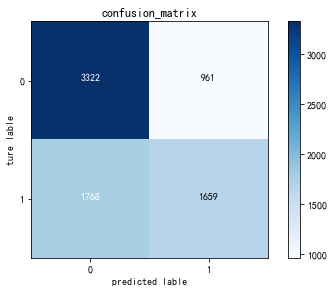

In [28]:
classes_names=[0,1]
plot_confusion_matrix(cnf_matrix_rfr,classes=classes_names)

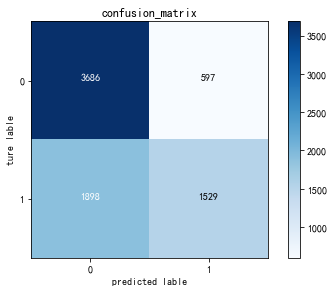

In [29]:
plot_confusion_matrix(cnf_matrix_lr,classes=classes_names)

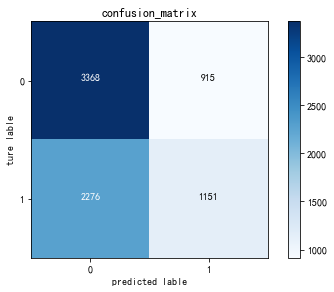

In [30]:
plot_confusion_matrix(cnf_matrix_knn,classes=classes_names)

In [31]:
def acu_curve(y,prob):
    fpr,tpr,threshold = roc_curve(y,prob) ###计算真正率和假正率
    roc_auc =metrics.auc(fpr,tpr) ###计算auc的值
 
    plt.figure()
    lw = 2
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.3f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
 
    plt.show()

<Figure size 432x288 with 0 Axes>

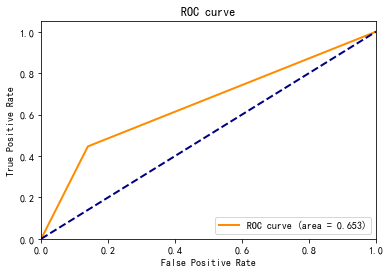

In [32]:
acu_curve(y_test,y_pred_lr)

<Figure size 432x288 with 0 Axes>

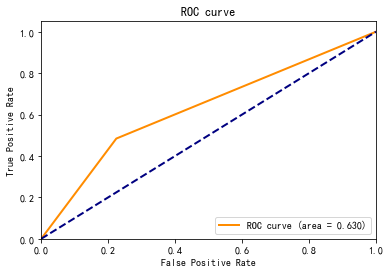

In [33]:
acu_curve(y_test,y_pred_rfr)

<Figure size 432x288 with 0 Axes>

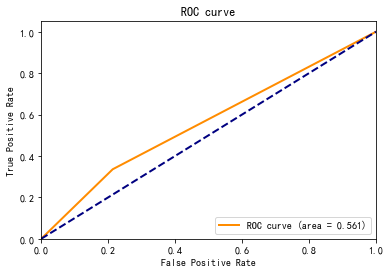

In [34]:
acu_curve(y_test,y_pred_knn)

In [35]:
def test_data_cross():
    print(cross_var_score(rfr,x_test,y_test,cv=5))
    print(cross_var_score(lr,x_test,y_test,cv=5))
    print(cross_var_score(knn,x_test,y_test,cv=5))